In [1]:
import QC_Library as qc
import json
import numpy as np
import numpy as np
from scipy.stats import iqr
import pandas as pd
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr

In [6]:
file='/Users/oz/downloads/nh_all.json'
retDict = qc.outliers.analyze(file, 'sc_o2_umolkg', gross_range=[50, 400],verbosity=1)

Starting with gross-range flags array
Starting with 726 flags
1   1473  points flagged by Spike Test
2   1675  points flagged by Spike Test
3   1751  points flagged by Spike Test
4   1787  points flagged by Spike Test
5   1798  points flagged by Spike Test
6   1802  total points flagged


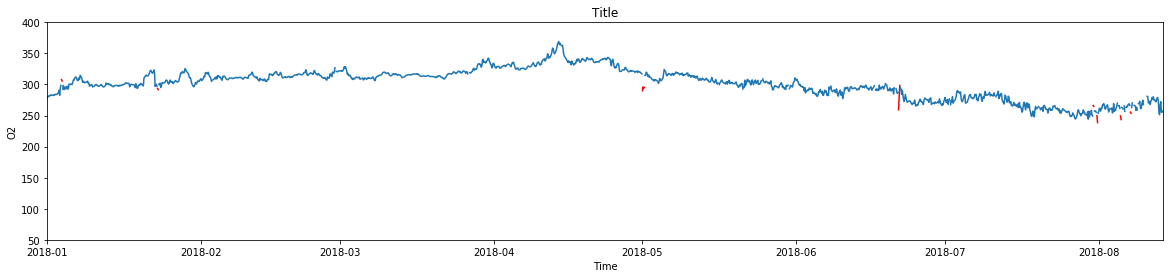

In [8]:
qc.outliers.diagnostic_plots(retDict['parameter'], retDict['data'], retDict['times'], 
                flag_arrays={'gross_range_flags' : retDict['gross_range_flags'],
                'spike_flags' : retDict['spike_flags']}, yrange=[50, 400], 
                time_range=['2018-01-01','2018-08-14'], title="Title", ylabel= 'O2', 
                xlabel='Time')


In [4]:
file='/Users/oz/downloads/nh_all.json'
retDict = qc.outliers.analyze(file, 'sal', gross_range=[0, 40])
print(retDict)

/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/QC_Library/outliers.py:41: RuntimeWarning: invalid value encountered in double_scalars
  numDevs[indx] = (data[indx] - means[indx])/np.sqrt(variances[indx])
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/QC_Library/outliers.py:40: RuntimeWarning: Mean of empty slice
  means[indx] = np.nanmean(data[window])
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/QC_Library/outliers.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  numDevs[indx] = (data[indx] - means[indx])/np.sqrt(variances[indx])
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/QC_Library/outliers.py:73: RuntimeWarning: invalid value encountered in greater
  localflags[np.where(np.ab

{'parameter': 'sal', 'data': array([ 0.   ,  0.   , 99.   , ..., 32.664, 32.661, 32.678]), 'times': array(['2010-09-07T15:17:01', '2010-09-07T18:17:01',
       '2010-09-07T18:47:00', ..., '2019-01-30T21:17:00',
       '2019-01-31T00:17:00', '2019-01-31T03:17:00'],
      dtype='datetime64[s]'), 'num_devs': array([        nan,         nan,         nan, ..., -0.17916128,
       -0.26327172, -0.01167748]), 'variances': array([0.      , 0.      , 0.      , ..., 0.014625, 0.0075  , 0.0165  ]), 'means': array([ 0.        ,  0.        ,  0.        , ..., 32.68566667,
       32.6838    , 32.6795    ]), 'gross_range_flags': array([2, 2, 4, ..., 2, 2, 2]), 'spike_flags': array([4, 4, 4, ..., 2, 2, 2])}


In [ ]:
diagnostic_plots(retDict['parameter'], retDict['data'], retDict['times'], flag_arrays=[retDict['gross_range_flags'],
                retDict['spike_flags']])


In [ ]:
def findBuoyLoc(inGrid, latGrid, lonGrid, lat, lon):
    # need the axes vectors
    absLatDiff = abs(latGrid - lat)
    absLonDiff = abs(lonGrid - lon)
#     clsLat = np.where(absLatDiff == np.min(absLatDiff))
#     clsLon = np.where(absLonDiff == np.min(absLonDiff))
    clsLat = np.argmin(absLatDiff)
    clsLon = np.argmin(absLonDiff)
    return clsLat,clsLon

def climatologyFlags(datafile, parameter, lat, lon, climatology_file, time_param='time_vals', 
                     climatology_time_period='Annual', climatology_format='NETCDF4', 
                     verbosity=0, lat_param='lat', lon_param='lon'):
    # get the rootgrp
    root_group = netCDF4.Dataset(climatology_file, "r", format="NETCDF4")
    
    # from the root group, get the lat and lon axes
    if verbosity > 1:
        summarizeWOAFile(climatology_file, parameter)
        print("Root Group =", root_group)
        
    # get the dimensions
    latSize = root_group.dimensions.get(lat_param).size
    lonSize = root_group.dimensions.get(lon_param).size
    if verbosity > 0:
        print("latSize=", latSize)
        print("lonSize=", lonSize)

    #fill arrays
    var_vals = root_group.variables.get(parameter)

    # Fill numpy array for the climatology grid with xarray
    ds = xr.open_dataset(climatology_file, decode_times=False)
    da = ds[parameter].values
    latVals = ds[lat_param].values
    lonVals = ds[lon_param].values 
#     var_vals = ds[parameter].values
    dims = var_vals.dimensions
    shape = var_vals.shape
    
    # TODO create a slice indicator
    # Needs to have 0 for time and depth dimensions Monday
    time_dim = 0
    depth_dim = 0
    time_pos = 0
    depth_pos = 0
    lat_pos = 2
    lon_pos = 3

    if verbosity > 0:
        plotGridFile(da[0, 0, :, :], latVals, lonVals) #TODO: needs to use shape of input netCDF file

    # find the climatology value at this lat/lon
    fLat,fLon = findBuoyLoc(var_vals, latVals, lonVals, 47.97, -125.37)
    if verbosity > 0:
        print(fLat,fLon)
        print(dims)
        print(shape)
        print(var_vals[0, 0, fLat, fLon]) #TODO: needs to use shape of input netCDF file
    
    # Now compare the values in the input array and flag
    
    # create a flag array if not passed in
    
    # create the output dictionary
    

In [ ]:
datafile='/Users/oz/downloads/nh_all.json' 
cli_file = '/Users/oz/Downloads/oxygen1/netcdf/all/1.00/woa13_all_o01_01.nc' 
climatologyFlags(datafile, 'o_an', 47.97, -125.37, cli_file, verbosity=1)

In [ ]:

cli_file = '/Users/oz/Downloads/GMIS_A_CHLA_07.nc'
climatologyFlags(datafile, 'Chl_a', 47.97, -125.37, cli_file, verbosity=1)